## Cvičení 1

## Podmínky zápočtu

Vypracování 2 zápočtových programů

### Předpokládané znalosti
spuštění programu, základní znalosti syntaxe, cykly, podmínky, vstup a výstup, textový a grafický => miniúloha za domácí úkol:



### Floating point aritmetika

Typicky používáme float64 s 53bitovou mantisou

Reprezentace des. čísel ve dvojkové soustavě: vytiskněte číslo 0.1 na 19 desetinných míst

In [1]:
"%.19f"%0.1

'0.1000000000000000056'

In [2]:
f"{0.1:.19f}"

'0.1000000000000000056'

In [3]:
"{:.19f}".format(0.1)

'0.1000000000000000056'

Sčítání a odčítání.

Vypočtěte $1+10^{-15}$ a $1+10^{-16}$

Kolik desítkových platných míst má float64 s 53-bitovou mantisou?

In [4]:
import numpy as np
np.log10(2**53)

15.954589770191003

Výpočty tedy probíhají přibližně s přesností na 16 platných míst. Relativní zaokrouhlovací chyba roste, pokud například počítáme rozdíl dvou podobně velkých čísel:

Vypočtěte $1.001-1$

In [5]:
1.001-1

0.0009999999999998899

Z důvodu zaokrouhlovací chyby také záleží na pořadí aritmetických operací (jsou vyhodnocovány zleva doprava):

Vypočtěte $10^{-15}+1-1$ a $1-1+10^{-15}$

Nevhodně navržený algoritmus může vést k "zesilování" chyby. Algoritmus potom je tzv. numericky nestabilní. Viz následující příklad:

Spočítejte členy následující posloupnosti pro $j=1\ldots10$:

$$x_0 = 1$$
$$x_j = (1.01 - x_{j-1})\cdot 100$$

a porovnejte s hodnotami vypočtenými "na papíře"

In [6]:
x = 1
# ukol 1
for j in range(1, 11):
    x = (1.01-x)*100
    print(j, x)

1 1.0000000000000009
2 0.9999999999999121
3 1.0000000000087939
4 0.9999999991206154
5 1.0000000879384574
6 0.9999912061542604
7 1.0008793845739605
8 0.912061542603948
9 9.7938457396052
10 -878.38457396052


Můžeme výpočet zpřesnit, například použitím np.float128?

In [7]:
x = 1
y = np.float128(101)/100
for j in range(1, 11):
    x = (y-x)*100
    print(j, x)

1 0.99999999999999999913
2 1.0000000000000000859
3 0.99999999999999141225
4 1.000000000000858774
5 0.9999999999141226002
6 1.0000000085877399801
7 0.99999914122600199167
8 1.000085877399800832
9 0.99141226001991679655
10 1.8587739980083203438


In [8]:
from mpmath import mp
mp.dps = 32 # pracujeme na 32 desetinnych mist
x = 1
y = mp.mpf("1.01")
for j in range(1, 11):
    x = (y-x)*100
    print(j, x)

1 0.99999999999999999999999999999998
2 1.0000000000000000000000000000018
3 0.99999999999999999999999999981694
4 1.0000000000000000000000000183059
5 0.99999999999999999999999816941312
6 1.0000000000000000000001830586878
7 0.99999999999999999998169413122167
8 1.0000000000000000018305868778334
9 0.99999999999999981694131221665877
10 1.000000000000018305868778334123


In [9]:
from mpmath import mp, iv
iv.dps = 16 # pouze 16 desetinnych mist
x = 1
y = iv.mpf("1.01")
for j in range(1, 11):
    x = (y-x)*100
    print(j, x, 1 in x) # V kazdem kroku overime, jestli spravne reseni je uvnitr intervalu

1 [0.999999999999998112621, 1.00000000000000088818] True
2 [0.999999999999909294779, 1.00000000000018962609] True
3 [0.99999999998103550336, 1.00000000000907141029] True
4 [0.99999999909285708366, 1.00000000189645055215] True
5 [0.999999810354942897384, 1.00000009071429252216] True
6 [0.999990928570745896131, 1.00001896450571114983] True
7 [0.998103549428883130012, 1.00090714292541127506] True
8 [0.909285707458870606779, 1.18964505711168788693] True
9 [-17.9645057111687909135, 10.0714292541129402103] True
10 [-906.142925411294044125, 1897.45057111687913221] True


#### Sčítání číselných řad

Spočítejte

$$y = \sum_{i=0}^{1000} \frac{1}{10^{-6} + i}$$

 - "popořadě"
 - v obráceném pořadí, tedy od nejmenších členů
 - s využitím knihovních funkce `sum` a `math.fsum`

a porovnejte výsledky

In [10]:
x = np.arange(1001)
y = 1/(1e-6 + x)

### Porovnávání čísel

Zjistěte, jestli se rovnají čísla:

$1+ 10^{-16}$ a $1$;

$(1.01-1)\cdot100$ a $1$

Vidíme, že z důvodu zaokrouhlovací chyby se mohou shodná čísla jevit jako různá a naopak. Je nutné toto mít na paměti a v případě potřeby použít porovnávání s tolerancí (absolutní a relativní, viz např funkce `np.isclose` a její dokumentace)

In [11]:
def isclose(a, b, rel_tol=1e-9, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

#### "Speciální" čísla: nula, nekonečno NaN

Poznámka bokem k typům v Pythonu: Python je dynamicky typovaný, takže jméno proměnné není nijak spjato s datovým typem, jako třeba v C/C++. Typ proměnné nebo výrazu můžeme zjistit příkazem `type`

In [12]:
x = 0
type(x)

int

In [13]:
x = 0.0
type(x)

float

A ještě jedna trochu záludná poznámka k typům čísel v Pythonu: spočtěte `1/0`, `1/0.0` a `1/np.sin(0)`. Proč se výsledky liší?








Je to typem čísel, zkuste type(0), type(0.0) a type(np.sin(0)

Problém je v různých typech float čísel. Numpy float umožňuje dělení nulou. Pouze generuje varování a korektně vrací hodnotu inf. Toto chování numpy lze nastavit.

64-bitový nulový numpy float můžete vytvořit příkazem `np.float64(0)` a tento datový typ dokáže reprezentovat i speciální hodnoty NaN (not a number, nedefinovaný výraz), +inf, -inf (nekonečna), +0, -0 (nula se znaménkem)

In [14]:
-np.float64(0), np.nan, -np.inf, np.inf

(-0.0, nan, -inf, inf)

Ukázka některých výpočtů s NaN a inf hodnotami:

In [15]:
1/np.float64(0), -1/np.float64(0)

/tmp/ipykernel_3573532/1809416172.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  1/np.float64(0), -1/np.float64(0)


(inf, -inf)

In [16]:
0/np.float64(0)

/tmp/ipykernel_3573532/608735182.py:1: RuntimeWarning: invalid value encountered in scalar divide
  0/np.float64(0)


nan

NaN dle definice není větší, menší, ani rovno žádnému číslu:

In [17]:
np.nan > 3, np.nan <= 3, np.nan == np.nan

(False, False, False)

In [18]:
np.inf == np.inf

True

In [19]:
-np.float64(0) == np.float64(0)

True

In [20]:
np.arctan(np.inf)/np.pi

0.5

In [21]:
np.inf > -np.nan

False

# Hledání kořenů

Naprogramujte hledání kořenů metodou půlení intervalu.

Najděte kořen sin(x) mezi 3 a 4 metodou půlení intervalu

In [22]:
a, b = 3, 4
f = np.sin

In [23]:
def bisect(f, a, b, maxiter=53):
    # ukol: definujte tělo této funkce
    if np.sign(f(a))*np.sign(f(b)) >= 0:
        raise(ValueError("Function sign must differ at a and b"))
    
    for i in range(maxiter):
        m = (a+b)/2.
        fm = f(m)
        if m in [a, b] or fm == 0:
            # floating point tolerance reached or exact solution found
            return m
        
        if fm*np.sign(f(a)) < 0:
            b = m
        elif fm*np.sign(f(b)) < 0:
            a = m
    
    return m

In [24]:
bisect(f, 3, 4)

3.141592653589793

In [25]:
np.pi

3.141592653589793

### Newtonova metoda

(nebylo na cvičení)

pro lin. funkci platí 
$$ f'(a_n) = \frac{f(a_{n+1}) - f(a_n)}{a_{n+1} - a_n}$$
hledáme $a_{n+1}$ aby $f(a_{n+1}) == 0$
$$ f'(a_n) = -\frac{f(a_n)}{a_{n+1} - a_{n}}$$
$$a_{n+1} = a_{n}-\frac{f(a_n)}{f'(a_n)}$$

In [26]:
def newton(f, df, a, maxiter=4):
    for i in range(maxiter):
        a_new = a - f(a)/df(a)
        if a_new == a:
            return a
        a = a_new
    return a

In [27]:
df = np.cos

In [28]:
newton(f, df, 4.8), newton(f, df, 4.)

(15.707963267948964, 3.141592653589793)

#### Zápis do souboru

(Nebylo na cvičení)

Vyhodnoťte funkci sin(x) ve 100 bodech na intervalu [0, 10] a uložte hodnoty x a sin(x) do souboru (např csv).

a) čistý Python

In [29]:
xmin = 0
xmax = 10
N = 100

In [30]:
import math

f = open("data.txt", "w")
for i in range(0, N):
    x = xmin + i*(xmax-xmin)/(N-1)
    y = math.sin(x)
    f.write("%f %f\n"%(x,y))
f.close()

Alternativní způsob práce se souborem

In [31]:
import math

with open("data.csv", "w") as f:
    for i in range(0, 100):
        x = xmin + i*(xmax-xmin)/(N-1)
        y = math.sin(x)
        f.write(f"{x:f} {y:f}\n")

b) s využitím numpy je to o poznání jednodušší

In [32]:
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)
np.savetxt("data.txt", np.vstack((x, y)).T)

#### Čtení ze souboru do pole

Načtěte data uložená v předchozí úloze a vykreslete funkci graficky na obrazovce

a) čistý Python

In [33]:
data = []

f = open("data.csv")
for line in f:
    data.append(list(map(float, line.strip().split(" "))))

b) s využitím numpy

In [34]:
data = np.loadtxt("data.csv")

Vykresleni

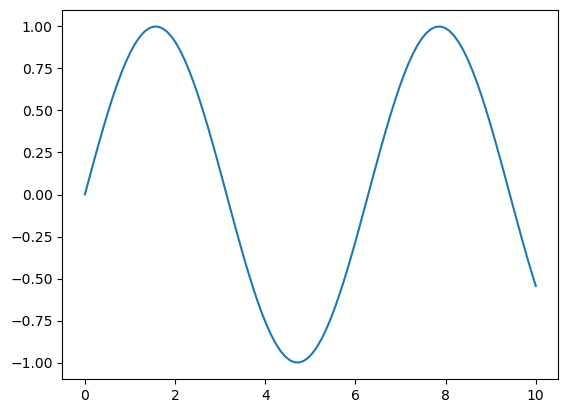

In [35]:
import matplotlib.pyplot as plt
plt.plot(data[:,0], data[:,1])